In [34]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [35]:
# Define file path
whale_path = Path('Instructions/Starter_Code/Resources/whale_returns.csv')

# Read the whale portfolio daily returns and clean the data
whale_returns_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns_df.dropna(inplace=True)

# Print the first 5 rows to check if the data was loaded correctly
print(whale_returns_df.head())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652  


In [36]:
 # Define file path
algo_path = Path('Instructions/Starter_Code/Resources/algo_returns.csv')

# Read the whale portfolio daily returns and clean the data
algo_returns_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns_df.dropna(inplace=True)

# Print the first 5 rows to check if the data was loaded correctly
print(algo_returns_df.head())

              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761


In [49]:
# Define file path
sp500_path = Path('Instructions/Starter_Code/Resources/sp500_history.csv')

# Read the S&P 500 historic closing prices and clean the data
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.dropna(inplace=True)

# Check Data Types
print(sp500_df.dtypes)

# Fix Data Types
sp500_df['sp500'] = sp500_df['Close'].str.replace('$', '').astype('float')

# Calculate Daily Returns
sp500_daily_returns = sp500_df['sp500'].pct_change()

# Drop nulls
sp500_daily_returns.dropna(inplace=True)

# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename("S&P 500 Daily Returns", inplace=True)

# Print the first 5 rows to check if the data was loaded correctly
print(sp500_daily_returns.head())

Close    object
dtype: object
Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
Name: S&P 500 Daily Returns, dtype: float64


C:\Users\jorge\AppData\Local\Temp\ipykernel_20324\2590014725.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['sp500'] = sp500_df['Close'].str.replace('$', '').astype('float')


In [50]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_df], axis='columns', join='inner')

# Sort the index in ascending order
combined_df = combined_df.sort_index()

# Display the combined DataFrame
print(combined_df.head())


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2     Close  

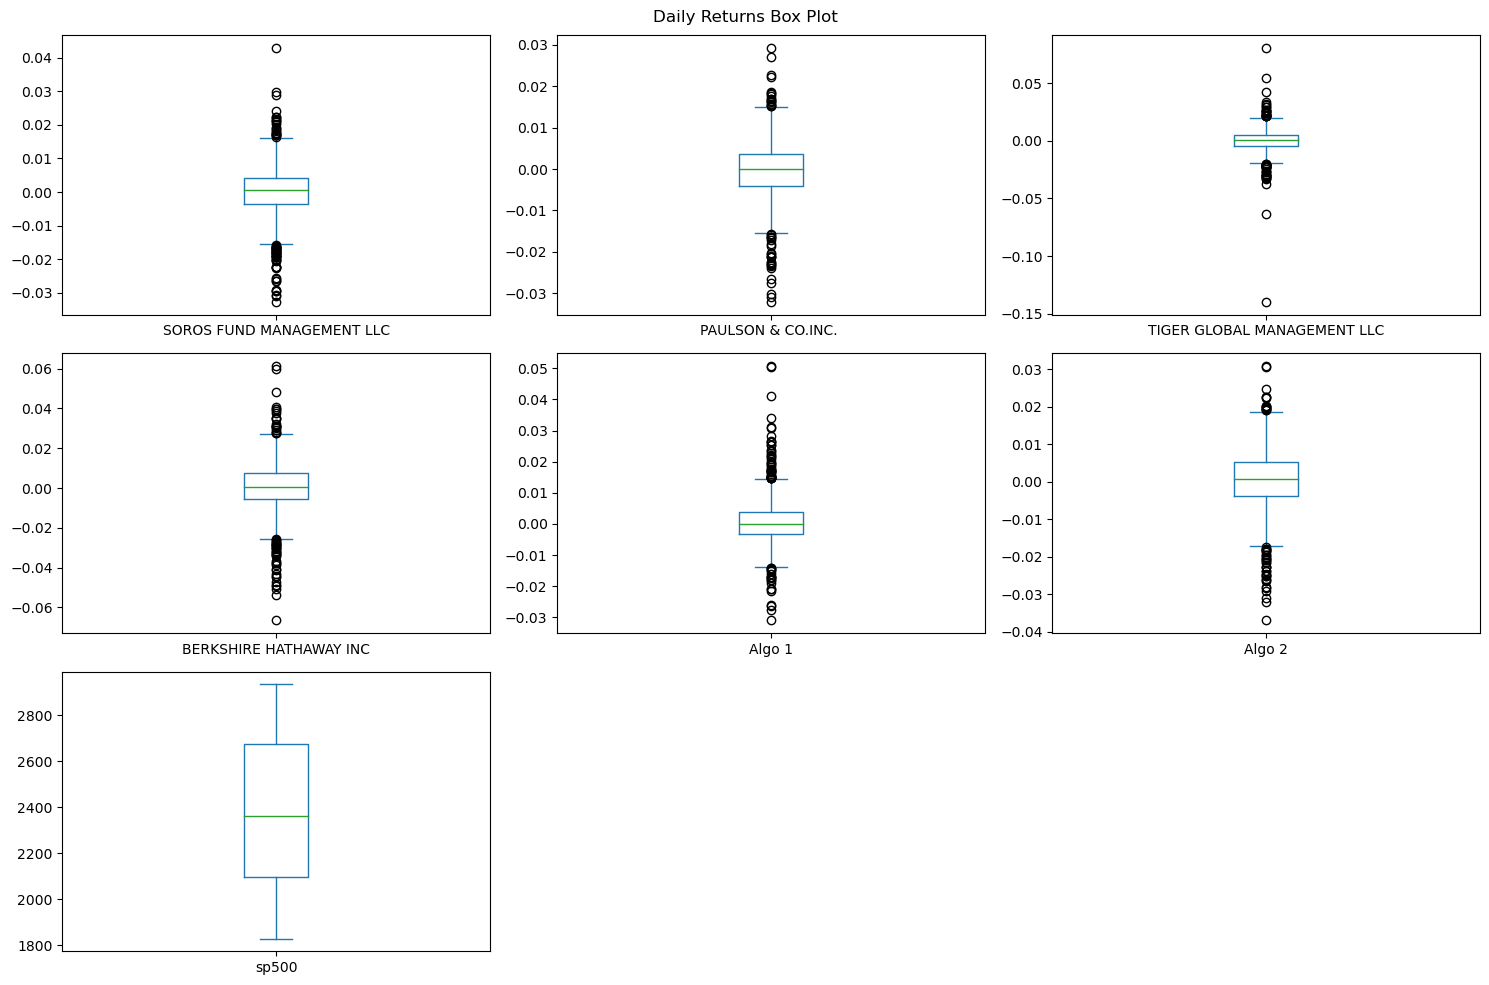

In [51]:
import matplotlib.pyplot as plt

# Create a list of column names for the funds
fund_list = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'Close', 'sp500']

# Create a box plot for each fund's daily returns
combined_df[fund_list].plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), title='Daily Returns Box Plot')
plt.tight_layout()
plt.show()


In [52]:
# Load CSV file
sp500_daily_returns_df = pd.read_csv('Instructions/Starter_Code/Resources/sp500_history.csv')

# Print the first few rows of the dataframe to verify that it loaded correctly
print(sp500_daily_returns_df.head())

        Date     Close
0  23-Apr-19  $2933.68
1  22-Apr-19  $2907.97
2  18-Apr-19  $2905.03
3  17-Apr-19  $2900.45
4  16-Apr-19  $2907.06


In [53]:
print(combined_df.isnull().sum())


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
Close                          0
sp500                          0
dtype: int64


In [54]:
print(whale_returns_df.shape)
print(algo_returns_df.shape)
print(sp500_daily_returns_df.shape)


(1059, 4)
(1235, 2)
(1649, 2)


In [55]:
print(whale_returns_df)
print(algo_returns_df)
print(sp500_daily_returns_df)


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-

In [56]:
print(combined_df)


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496             

In [57]:
print(whale_returns_df)
print(whale_returns_df.index)

print(algo_returns_df)
print(algo_returns_df.index)

print(sp500_daily_returns_df)
print(sp500_daily_returns_df.index)


            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-

In [58]:
print(combined_df.index)


DatetimeIndex(['2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06',
               '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12',
               '2015-03-13', '2015-03-16',
               ...
               '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
               '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18',
               '2019-04-22', '2019-04-23'],
              dtype='datetime64[ns]', name='Date', length=1043, freq=None)


<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

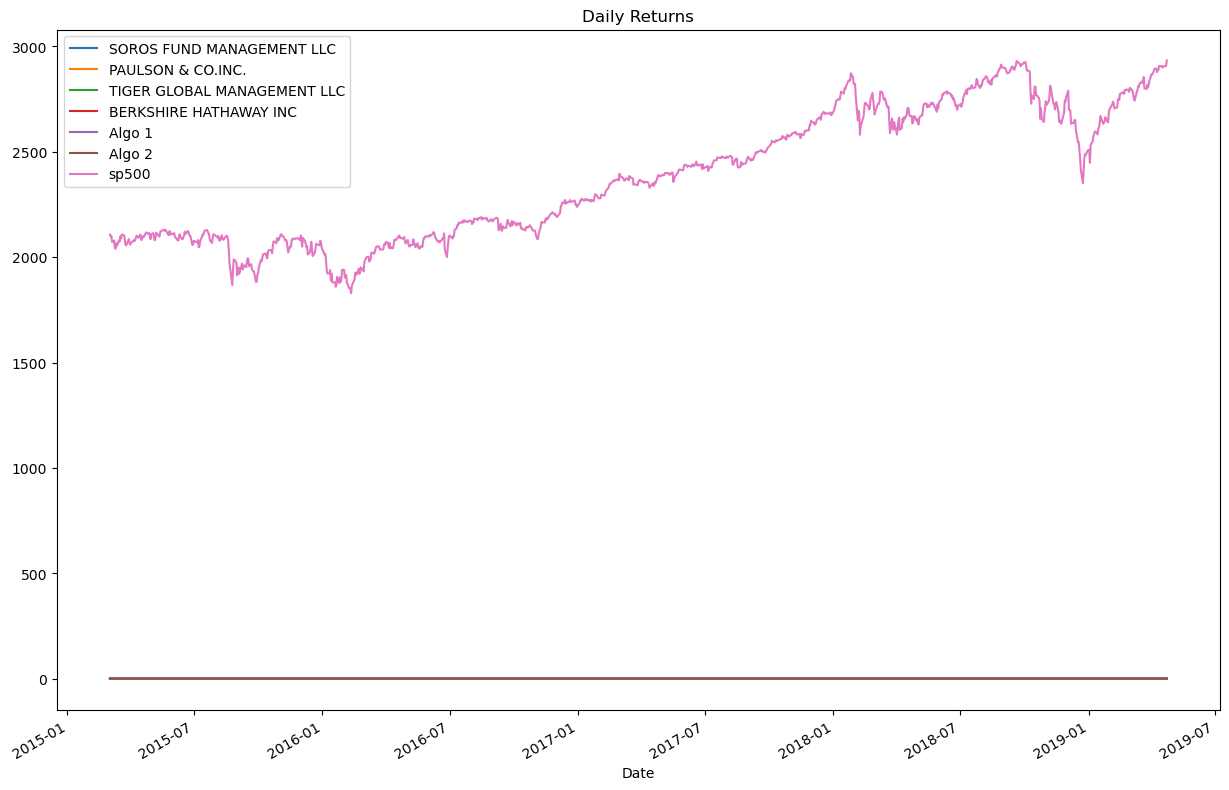

In [59]:
# Calculate and Plot the daily returns
combined_df.plot(figsize=(15,10), title='Daily Returns')

In [60]:
# Calculate and Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot(figsize=(15,10), title='Cumulative Returns')

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [61]:
whale_returns_std = whale_returns_df.std()
print(whale_returns_std)


SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64


In [62]:
# Calculate annualized standard deviation for all portfolios
whale_annualized_std = whale_returns_df.std() * np.sqrt(252)


# Print the results
print("Annualized Standard Deviation:")
print("-----------------------------")
print(f"Whale Portfolio: {whale_annualized_std}")
print(f"Tiger Global Management Portfolio: {tiger_annualized_std}")
print(f"Berkshire Hathaway Portfolio: {berkshire_annualized_std}")
print(f"S&P 500 Index: {sp500_annualized_std}")
print(f"Algo 1 Portfolio: {algo_annualized_std}")


Annualized Standard Deviation:
-----------------------------
Whale Portfolio: SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64


NameError: name 'tiger_annualized_std' is not defined